<a href="https://colab.research.google.com/github/soodeh-nilforoushan/NLP-Basics/blob/main/TF_IDF_recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TF-IDF Score: The TF-IDF score for a term in a document is the product of its TF and IDF values. It quantifies how important the term is in the document relative to its importance across the entire corpus.

TF-IDF(term, document, corpus) = TF(term, document) * IDF(term, corpus)


In [1]:
# https://www.kaggle.com/tmdb/tmdb-movie-metadata
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv


--2023-09-14 05:35:59--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  3.81MB/s    in 1.4s    

2023-09-14 05:36:01 (3.81 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances


In [3]:
df=pd.read_csv("tmdb_5000_movies.csv")

In [4]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
x=df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [6]:
x["genres"]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [7]:
x["keywords"]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [8]:
j=json.loads(x["genres"])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [9]:
#As you recall, some genres such as science fiction, contain multiple tokens. We would like to treat them like a single word.
#One easy way to do this is to split the string on whitespace and then join it back together using an empty string
" ".join("".join(jj["name"]) for jj in j)


'Action Adventure Fantasy Science Fiction'

In [10]:
def genres_and_keywords_to_string(row):
  genres=json.loads(row["genres"])
  genres=" ".join("".join(j["name"]) for j in genres)

  keywords=json.loads(row["keywords"])
  keywords=" ".join("".join(j["name"]) for j in keywords)
  return "%s %s" % (genres, keywords)

In [11]:
#create a new string representation of each movie
df["string"] = df.apply(genres_and_keywords_to_string, axis=1)

In [12]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy Science Fiction cultu...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drug abuse exot...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime spy based on novel secr...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller dc comics crime fi...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure Science Fiction based on nove...


In [13]:
#create a tf-idf vectorizor object
#2000 keep the most frequent words in the corpus
tfidf=TfidfVectorizer(max_features=2000)


In [14]:
#create a data matrix from overviews
X=tfidf.fit_transform(df["string"])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 54750 stored elements in Compressed Sparse Row format>

In [15]:
#generate a mapping from movie title -> index (in df)
#It's not obvious which row of The Matrix corresponds to which movie.
movie2idx= pd.Series(df.index, index=df["title"])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [16]:
idx=movie2idx["Scream 3"]
idx

1164

In [17]:
query= X [idx]
query
#We've essentially just grabbed a single row of our TFT of Matrix.

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [18]:
#print the query vector and see the values
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [19]:
#compute similary between query and every vector in X
#Note that this includes the query vector itself because the query vector came from X.
#This is not always the case.
#For example, if you have a search engine where the user can type in their own data.
scores=cosine_similarity(query,X)
scores

array([[0.        , 0.02034653, 0.        , ..., 0.        , 0.        ,
        0.        ]])

 This function does a pairwise similarity, if I had a 10 query vectors and 20 vectors to check against, then my result would be 10 by 20.

In this case, I have one query vector and 4800 vectors in my database.

Therefore, the result will be approximately one by 4800.

In [20]:
#currently the array is 1 * N, make it just 1-d array
scores=scores.flatten()
print(scores)

[0.         0.02034653 0.         ... 0.         0.         0.        ]


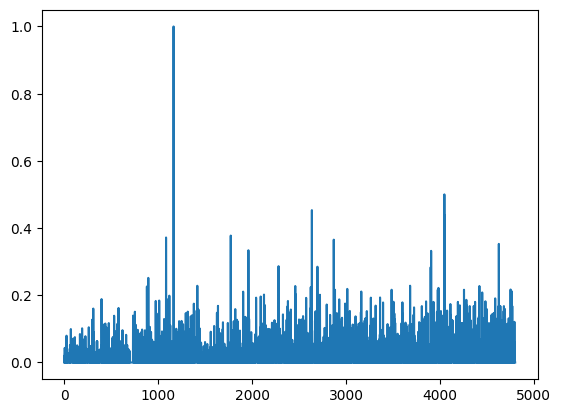

In [21]:
plt.plot(scores)

it appears very noisy with one big spike. Of course, this big spike is just the query movie, since the cosine similarity between the two of the same vector is just one of the other similarities are much smaller, with a max around 0.4

In [22]:
(-scores).argsort()

array([1164, 4048, 2637, ..., 1886, 1870, 4802])

we know that sorting by default usually results in the items going in ascending order. In our case, we want them to go in descending order with the most similar item at the front.
we don't care about the score values only how they rank amongst one another.

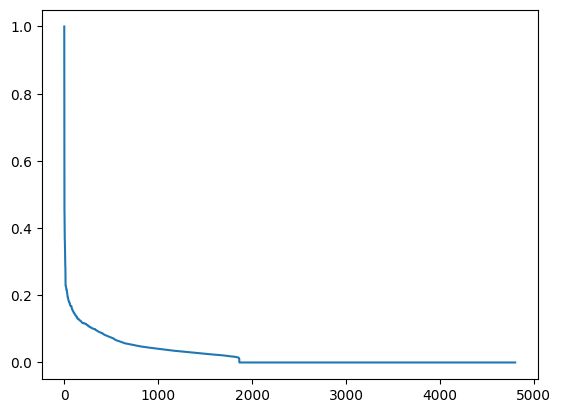

In [23]:

plt.plot(scores[(-scores).argsort()])

In [24]:
#get top 5 matches
#exclude self (similarity between query and itself yileds max score)
recommended_idx= (-scores).argsort()[1:6]

In [25]:
#convert indiced back to titles
df["title"].iloc[recommended_idx]

4048                         The Calling
2637                   Felicia's Journey
4053    Friday the 13th: A New Beginning
1773                         Mindhunters
1084                     The Glimmer Man
Name: title, dtype: object

these results seem promising for scream3

In [26]:
#create a finction that generated recommendations
def recommend(title):
  # get the tow in the dataframe for this movie
  idx = movie2idx[title]
  if type(idx) == pd.Series:
    idx=idx.iloc[0]
  #claculate the pairwise similarities for this movie
  query = X[idx]
  scores =cosine_similarity(query, X)

  #currently the array is 1 * N make it just 1-D array
  scores=scores.flatten()

  #get the indexes of the highes scoring movies
  # get the first K recommendation
  # do not return itself
  recommended_idx=(-scores).argsort()[1:6]

  #return the titles of the recommendation
  return df["title"].iloc[recommended_idx]

In [27]:
print("recommendations for Scream 3:")
print(recommend("Scream 3"))

recommendations for Scream 3:
4048                         The Calling
2637                   Felicia's Journey
4053    Friday the 13th: A New Beginning
1773                         Mindhunters
1084                     The Glimmer Man
Name: title, dtype: object


In [28]:
print("recommendations for Runaway Bride")
print(recommend("Runaway Bride"))

recommendations for Runaway Bride
4115                    House of D
2168                     Appaloosa
4045         Dancer, Texas Pop. 81
2325    My Big Fat Greek Wedding 2
4079                Boys Don't Cry
Name: title, dtype: object
